#### Halo mass, stellar mass and velocity dispersion relations

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from hmf import MassFunction
from astropy.cosmology import Planck18 as cosmo

In [23]:
import hmf
print(hmf.__version__)
MassFunction.parameter_info()
MassFunction.get_all_parameter_defaults(recursive=False)

3.5.2
cosmo_model : instance of `astropy.cosmology.FLRW` subclass
    The basis for the cosmology -- see astropy documentation. Can be a custom
    subclass. Defaults to Planck18.

cosmo_params : dict
    Parameters for the cosmology that deviate from the base cosmology passed.
    This is useful for repeated updates of a single parameter (leaving others
    the same). Default is the empty dict. The parameters passed must match
    the allowed parameters of `cosmo_model`. For the basic class this is
    :Tcmb0: Temperature of the CMB at z=0
    :Neff: Number of massless neutrino species
    :m_nu: Mass of neutrino species (list)
    :H0: The hubble constant at z=0
    :Om0: The normalised matter density at z=0

n : float
    Spectral index of fluctuations
    Must be greater than -3 and less than 4.

sigma_8 : float
    RMS linear density fluctuations in spheres of radius 8 Mpc/h

growth_params : dict
    Relevant parameters of the :attr:`growth_model`.

lnk_min : float
    Minimum (na

{'cosmo_model': FlatLambdaCDM(name='Planck18', H0=<Quantity 67.66 km / (Mpc s)>, Om0=0.30966, Tcmb0=<Quantity 2.7255 K>, Neff=3.046, m_nu=<Quantity [0.  , 0.  , 0.06] eV>, Ob0=0.04897),
 'cosmo_params': {},
 'n': 0.9667,
 'sigma_8': 0.8159,
 'growth_params': {},
 'lnk_min': np.float64(-18.420680743952367),
 'lnk_max': np.float64(9.903487552536127),
 'dlnk': 0.05,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10.0,
 'Mmax': 15.0,
 'dlog10m': 0.01,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.686,
 'hmf_params': {},
 'filter_model': hmf.density_field.filters.TopHat,
 'filter_params': {},
 'disable_mass_conversion': True}

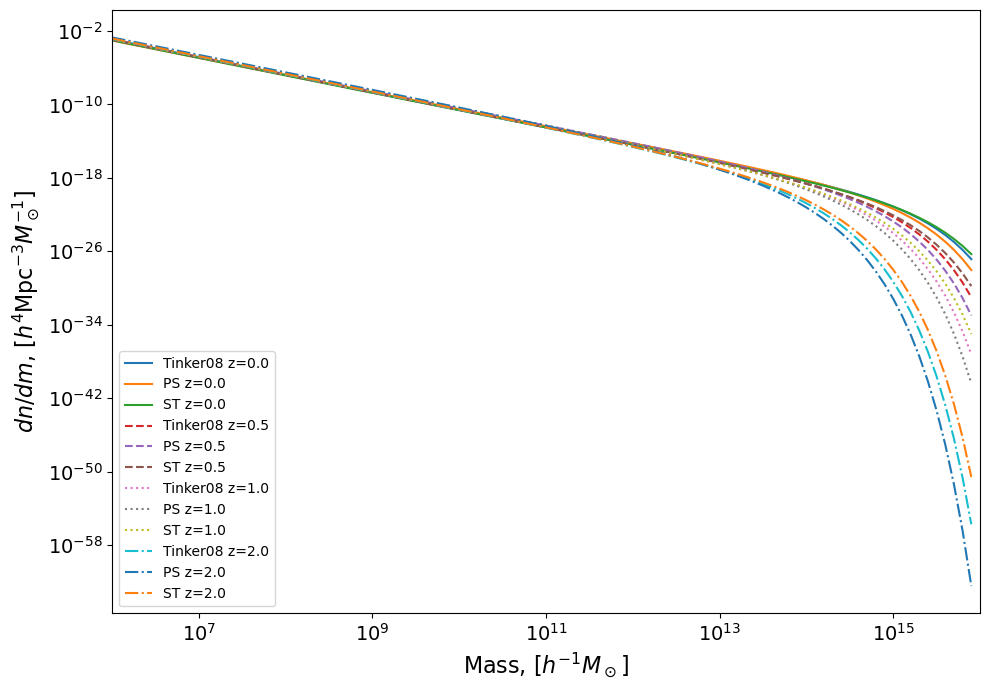

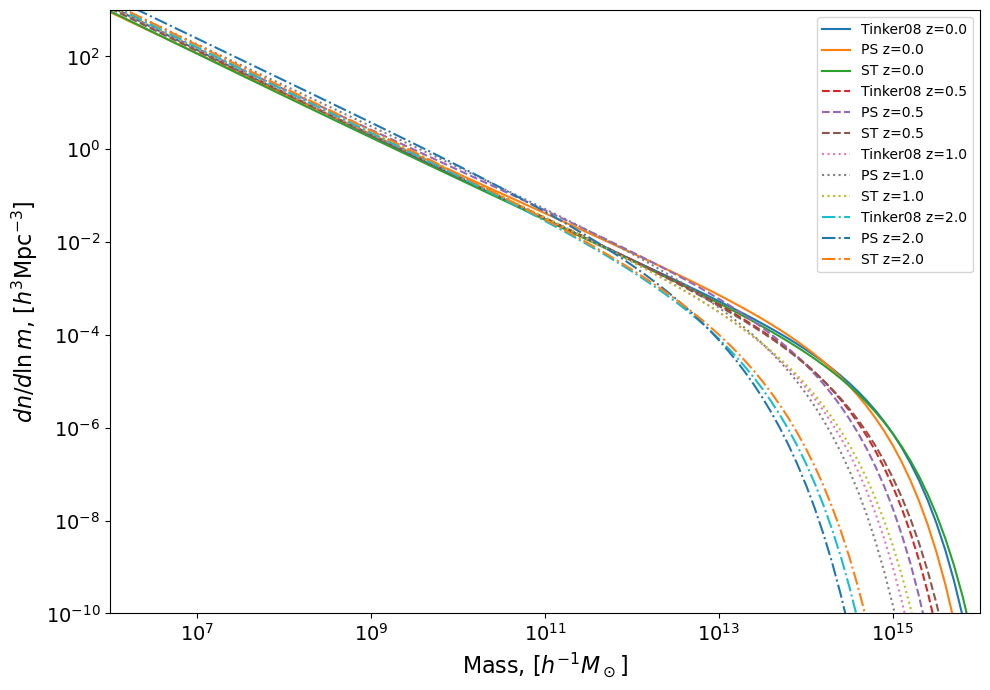

In [65]:
M_min = 6  # in Msun/h
M_max = 16  # in Msun/h
dlog10m = 0.1  # in log10(Msun/h)
z_list = [0.0, 0.5, 1.0, 2.0]
line_styles = ['-', '--', ':', '-.']
plt.figure(figsize=(10, 7))
for z, ls in zip(z_list, line_styles):
    mf_t = MassFunction(z=z, Mmin=M_min, Mmax=M_max, dlog10m=dlog10m, hmf_model="Tinker08")
    mf_ps = MassFunction(z=z, Mmin=M_min, Mmax=M_max, dlog10m=dlog10m, hmf_model="PS")
    mf_st = MassFunction(z=z, Mmin=M_min, Mmax=M_max, dlog10m=dlog10m, hmf_model="ST")
    plt.loglog(mf_t.m, mf_t.dndm, linestyle=ls, label=f'Tinker08 z={z}')
    plt.loglog(mf_ps.m, mf_ps.dndm, linestyle=ls, label=f'PS z={z}')
    plt.loglog(mf_st.m, mf_st.dndm, linestyle=ls, label=f'ST z={z}')
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$", fontsize= 16)
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$", fontsize= 16)
plt.xlim(10**M_min, 10**M_max)
#plt.ylim(1e-20, 1e2)
#plt.title("Halo Mass Function at Various Redshifts")
plt.legend()
plt.tick_params(labelsize = 14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
for z, ls in zip(z_list, line_styles):
    mf_t = MassFunction(z=z, Mmin=M_min, Mmax=M_max, dlog10m=dlog10m, hmf_model="Tinker08")
    mf_ps = MassFunction(z=z, Mmin=M_min, Mmax=M_max, dlog10m=dlog10m, hmf_model="PS")
    mf_st = MassFunction(z=z, Mmin=M_min, Mmax=M_max, dlog10m=dlog10m, hmf_model="ST")
    plt.loglog(mf_t.m, mf_t.dndlnm, linestyle=ls, label=f'Tinker08 z={z}')
    plt.loglog(mf_ps.m, mf_ps.dndlnm, linestyle=ls, label=f'PS z={z}')
    plt.loglog(mf_st.m, mf_st.dndlnm, linestyle=ls, label=f'ST z={z}')
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$", fontsize= 16)
plt.ylabel(r"$dn/d\ln m$, $[h^{3}{\rm Mpc}^{-3}]$", fontsize= 16)
plt.xlim(10**M_min, 10**M_max)
plt.ylim(1e-10, 1e3)
#plt.title("Halo Mass Function at Various Redshifts")
plt.legend()
plt.tick_params(labelsize = 14)
plt.tight_layout()
plt.show()

#### Stellar mass halo mass relation
$\frac{M_\star}{M_h} = 2N \left[\left(\frac{M_h}{M_1}\right)^{-\beta} + \left(\frac{M_h}{M_1}\right)^{\gamma}\right]^{-1}$

where $N = 0.035$, $M_1 = 10^{11.6} M_\odot$, $\beta = 1.4$, and $\gamma = 0.6$.$

### $\frac{dn}{d\ln M_\star} = \frac{dn}{d\ln M_h} \left| \frac{d\ln M_h}{d\ln M_\star} \right| \,$

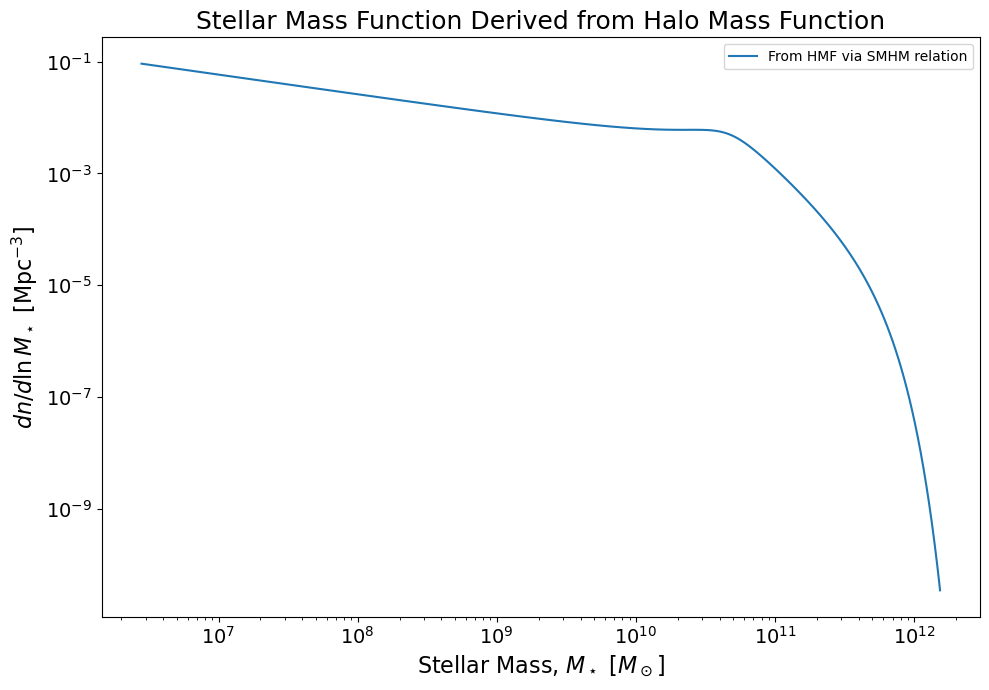

In [80]:
# halo mass grid from HMF
z = 0
M_min = 10  # in Msun/h
M_max = 16  # in Msun/h
dlog10m = 0.05  # in log10(Msun/h)
mf_st = MassFunction(z=z, Mmin=M_min, Mmax=M_max, dlog10m=dlog10m, hmf_model="ST")
M_h = mf_st.m
dn_dlnMh = mf_st.dndlnm

# Moster+13 relation
def smhm_relation(M_h):
    M_1 = 10**11.6
    N = 0.0351
    beta = 1.5
    gamma = 0.6
    return 2 * N * M_h / ((M_h / M_1)**(-beta) + (M_h / M_1)**gamma)

M_star = smhm_relation(M_h)

# Jacobian
logMh = np.log(M_h)
logMs = np.log(M_star)
dlogMs_dlogMh = np.gradient(logMs, logMh)
jacobian = 1.0 / dlogMs_dlogMh

# SMF from HMF
dn_dlnMs = dn_dlnMh * jacobian
plt.figure(figsize=(10, 7))
plt.loglog(M_star, dn_dlnMs, label='From HMF via SMHM relation')
plt.xlabel(r"Stellar Mass, $M_\star$ [$M_\odot$]", fontsize=16)
plt.ylabel(r"$dn/d\ln M_\star$ [${\rm Mpc}^{-3}$]", fontsize=16)
plt.title("Stellar Mass Function Derived from Halo Mass Function", fontsize=18)
plt.tick_params(labelsize=14)
plt.legend()
plt.tight_layout()
plt.show()

$\sigma(M_\star) = \sigma_0 \left(\frac{M_\star}{10^{11}\,M_\odot}\right)^{\alpha},$ where $\sigma_0 = 200$ km/s, and $\alpha = 0.25$

$\ln \sigma = \ln \sigma_0 + \alpha \ln M_\star - \alpha \ln (10^{11} M_\odot)$

Jacobian:
$\frac{d \ln \sigma}{d \ln M_\star} = \alpha \quad\Rightarrow\quad \frac{d \ln M_\star}{d \ln \sigma} = \frac{1}{\alpha}$

Change of variables:
#### $\Phi_\sigma(\sigma) \equiv \frac{dn}{d\ln \sigma} = \frac{dn}{d\ln M_\star} \left| \frac{d \ln M_\star}{d \ln \sigma} \right|$

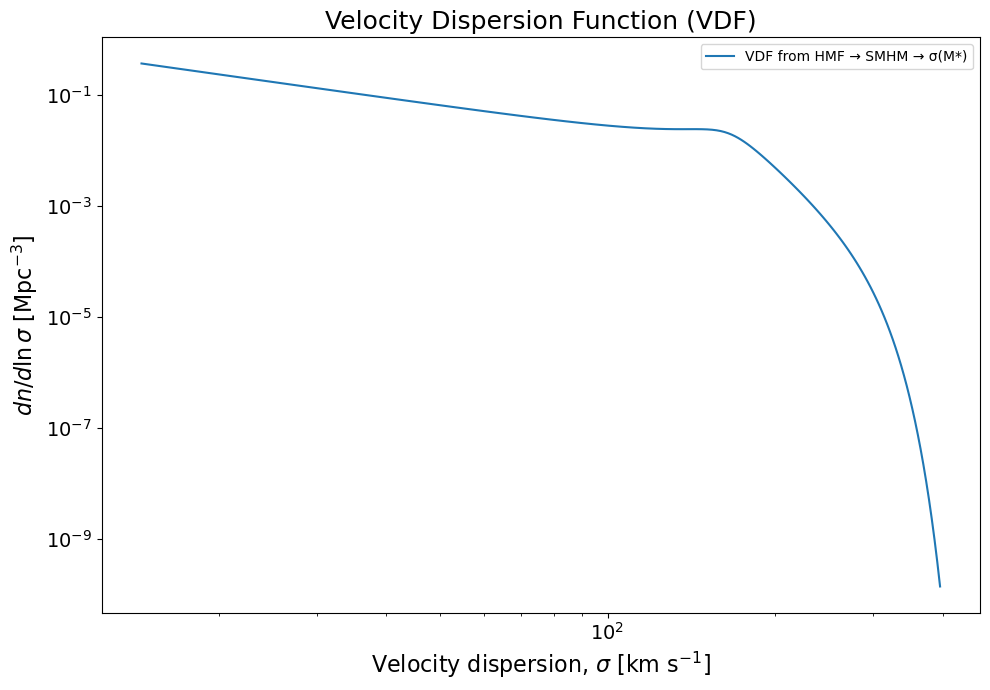

In [81]:
# sigma(M*) relation
def sigma_from_Mstar(M_star, sigma0=200.0, alpha=0.25):
    """
    Velocity dispersion in km/s
    """
    return sigma0 * (M_star / 1e11)**alpha

sigma = sigma_from_Mstar(M_star)
alpha = 0.25
jacobian_sigma = 1.0 / alpha
## VDF from SMF
dn_dlnsigma = dn_dlnMs * jacobian_sigma

plt.figure(figsize=(10, 7))
plt.loglog(sigma, dn_dlnsigma, label='VDF from HMF → SMHM → σ(M*)')
plt.xlabel(r"Velocity dispersion, $\sigma$ [km s$^{-1}$]", fontsize=16)
plt.ylabel(r"$dn/d\ln \sigma$ [${\rm Mpc}^{-3}$]", fontsize=16)
plt.title("Velocity Dispersion Function (VDF)", fontsize=18)
plt.tick_params(labelsize=14)
plt.legend()
plt.tight_layout()
plt.show()

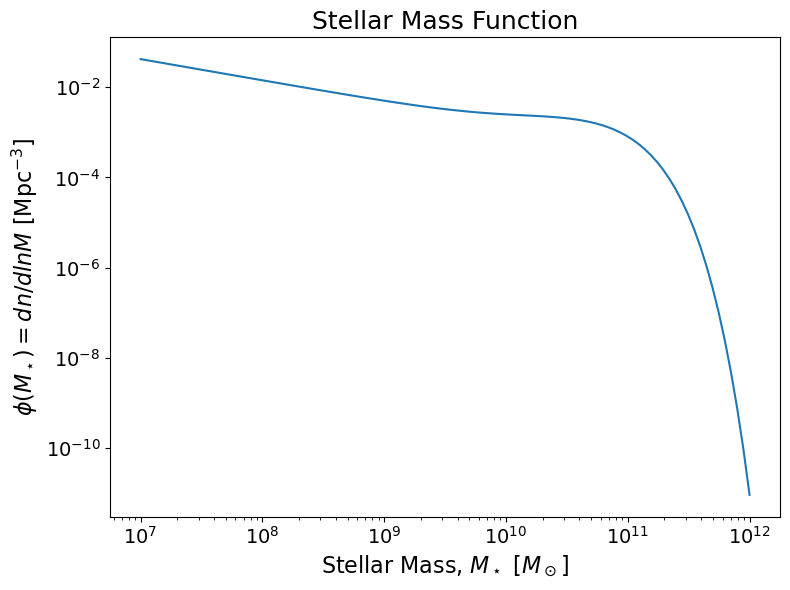

In [ ]:
### From Bovy's galaxy book

def stellar_mass_function(M,Mstar=10.**10.66*u.Msun,
                         phi1= 3.96*1e-3/u.Mpc**3,
                         alpha1=-0.35,
                         phi2= 0.79*1e-3/u.Mpc**3,
                         alpha2=-1.47):
    # d Mstellar / d ln M
    return M/Mstar*np.exp(-M/Mstar)*(phi1*(M/Mstar)**alpha1
                                        +phi2*(M/Mstar)**alpha2)
M_stellar = np.logspace(7, 12, 100)*u.Msun
smf = stellar_mass_function(M_stellar)
plt.figure(figsize=(8, 6))
plt.loglog(M_stellar, smf)
plt.xlabel(r"Stellar Mass, $M_\star$ [$M_\odot$]", fontsize=16)
plt.ylabel(r"$\phi(M_\star) = dn/dlnM$ [${\rm Mpc}^{-3}$]", fontsize=16)
plt.title("Stellar Mass Function", fontsize=18)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.show()